# Generate logos for activation of convolutional filters
The code was adapted from https://github.com/utkuozbulak/pytorch-cnn-visualizations and makes use of [logomaker](https://github.com/jbkinney/logomaker/) to perform the plotting.

In [1]:
import sys

sys.path.append("../src/models/")
sys.path.append("../src/post-processing/")

import logomaker
import numpy as np
import os
import pandas as pd  # just for the test
import torch
import matplotlib.pyplot as plt

from torch.nn import Parameter
from torch.optim import Adam

from conv_LSTM_onehot import convLSTM
from plot_conv import CNNLayerVisualization, recreate_logo

plt.rcParams["figure.figsize"] = 14, 4

## Load  neural network

In [2]:
t = 100
path_model = "../data/models/convlstm_big.pt"

pretrained_model = convLSTM(
    input_dim=4,
    out_channels=4,
    stride=5,
    hidden_dim=60,
    hidden_out=140,
    output_dim=2,
    t=t,
).cpu()

pretrained_model.load_state_dict(
    torch.load(path_model, map_location=torch.device("cpu"))
)

/home/jorge/.local/lib/python3.6/site-packages/torch/nn/modules/rnn.py:51: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


<All keys matched successfully>

## Optimized sequences for two filters

In [3]:
cnn_layer = 0
filter_pos = 0
# init objects
layer_vis_1 = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)
layer_vis_2 = CNNLayerVisualization(pretrained_model, cnn_layer, 1)
# optimize
opt1 = layer_vis_1.visualise_layer1D(save=False)
opt2 = layer_vis_2.visualise_layer1D(save=False)

Iteration: 1 Loss: -1.38
Iteration: 2 Loss: -2.31
Iteration: 3 Loss: -3.10
Iteration: 4 Loss: -3.50
Iteration: 5 Loss: -3.72
Iteration: 6 Loss: -3.89
Iteration: 7 Loss: -3.97
Iteration: 8 Loss: -4.07
Iteration: 9 Loss: -4.12
Iteration: 10 Loss: -4.22
Iteration: 11 Loss: -4.36
Iteration: 12 Loss: -4.51
Iteration: 13 Loss: -4.65
Iteration: 14 Loss: -4.75
Iteration: 15 Loss: -4.85
Iteration: 16 Loss: -4.92
Iteration: 17 Loss: -4.97
Iteration: 18 Loss: -5.02
Iteration: 19 Loss: -5.10
Iteration: 20 Loss: -5.17
Iteration: 21 Loss: -5.24
Iteration: 22 Loss: -5.30
Iteration: 23 Loss: -5.33
Iteration: 24 Loss: -5.35
Iteration: 25 Loss: -5.39
Iteration: 26 Loss: -5.43
Iteration: 27 Loss: -5.45
Iteration: 28 Loss: -5.48
Iteration: 29 Loss: -5.49
Iteration: 30 Loss: -5.50
Iteration: 31 Loss: -5.52
Iteration: 32 Loss: -5.54
Iteration: 33 Loss: -5.56
Iteration: 34 Loss: -5.58
Iteration: 35 Loss: -5.60
Iteration: 36 Loss: -5.61
Iteration: 37 Loss: -5.62
Iteration: 38 Loss: -5.64
Iteration: 39 Loss: -

## First filter

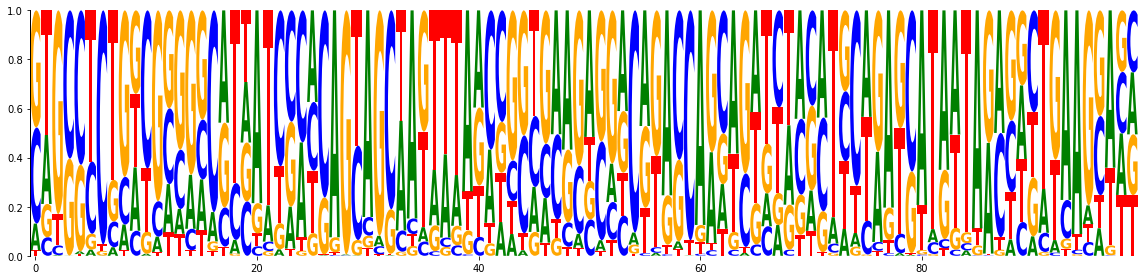

In [6]:
fig = recreate_logo(opt1)

## Second filter

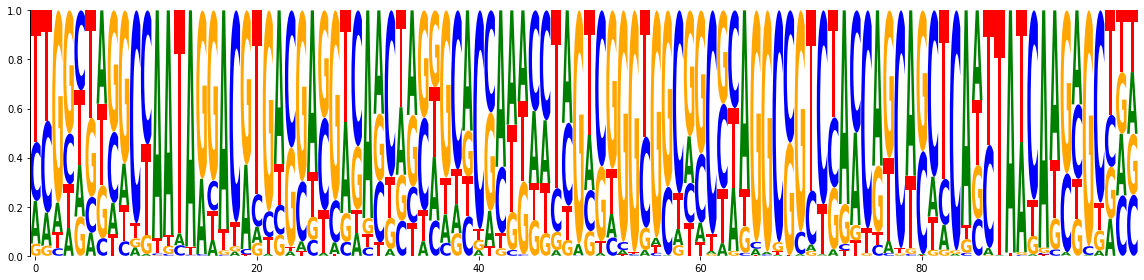

In [7]:
fig = recreate_logo(opt2)